In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal?

In [3]:
mean_1 = np.array([5, 3])
cov_1 = np.array([[1, 1.3], [1.3, 1]])

In [4]:
mean_2 = np.array([13, 15])
cov_2 = np.array([[1, 1.3], [1.3, 1]])

In [5]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, 500)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_25932\1728713866.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, 500)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_25932\1728713866.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, 500)


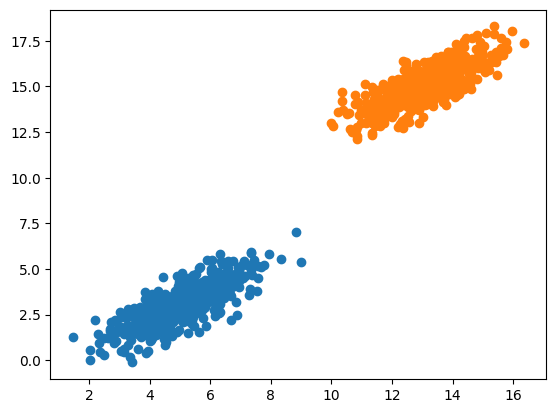

In [6]:
plt.scatter(dist_1[:, 0], dist_1[:, 1])
plt.scatter(dist_2[:, 0], dist_2[:, 1])

In [7]:
print(dist_1.shape, dist_2.shape)

(500, 2) (500, 2)


In [8]:
dataset = np.zeros((1000, 3))

In [9]:
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1

In [10]:
dataset[10:]

array([[ 5.38166269,  3.7124839 ,  0.        ],
       [ 4.35665949,  2.64653624,  0.        ],
       [ 5.20975382,  3.16952831,  0.        ],
       ...,
       [12.24465506, 13.89427452,  1.        ],
       [13.84106475, 16.88164987,  1.        ],
       [12.99581687, 14.46735444,  1.        ]])

In [11]:
np.random.shuffle(dataset)

In [12]:
dataset[10:]

array([[ 3.15231746,  0.45860267,  0.        ],
       [ 5.80209386,  2.86805469,  0.        ],
       [13.48251206, 16.15547814,  1.        ],
       ...,
       [ 5.2487549 ,  2.33432673,  0.        ],
       [ 3.99510429,  1.42987598,  0.        ],
       [11.88585002, 14.04923352,  1.        ]])

In [13]:
split = 0.8
train_X = dataset[:int(split * dataset.shape[0]), :-1]
train_Y = dataset[:int(split * dataset.shape[0]), -1]
test_X = dataset[int(split * dataset.shape[0]):, :-1]
test_Y = dataset[int(split * dataset.shape[0]):, -1]

In [14]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(800, 2) (800,) (200, 2) (200,)


In [15]:
def sigmoid(X):
    return 1/(1 + np.exp(-X))

In [16]:
def hypothesis(X, weights):
    return sigmoid(np.dot(X, weights))

In [17]:
def cost(X, Y, weight):
    hyp_th = hypothesis(X, weight)
    loss = np.mean(Y * np.log(hyp_th) + (1 - Y) * np.log(1 - hyp_th))
    return -1 * loss

In [18]:
def gradient(X, Y, weight):
    y_p = hypothesis(X, weight)
    grad = np.dot(X.T, (Y - y_p))
    return grad/X.shape[0]

In [19]:
def gradient_descent(X, Y):
    epochs = 2000
    lr_rate = 0.03
    loss_epoch = []
    
    weights = np.zeros((X.shape[1], ))
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        loss_epoch.append(cost(X, Y, weights))
        weights = weights + lr_rate * grad
    return weights, loss_epoch

In [20]:
ones = np.ones((train_X.shape[0], 1))
train_X  = np.hstack((ones, train_X))

ones = np.ones((test_X.shape[0], 1))
test_X  = np.hstack((ones, test_X))

In [21]:
weight, cost = gradient_descent(train_X, train_Y)

In [22]:
cost

[0.6931471805599452,
 0.5737517114847381,
 0.5520653803949329,
 0.5420768645800385,
 0.5327114252315428,
 0.5235896840680622,
 0.5147048454200234,
 0.5060510030016663,
 0.4976222778973189,
 0.48941283002710007,
 0.48141687013569706,
 0.47362867067811926,
 0.46604257559694445,
 0.45865300902504313,
 0.4514544829557856,
 0.4444416039282359,
 0.43760907877898375,
 0.4309517195152033,
 0.42446444736539846,
 0.41814229606521136,
 0.4119804144357614,
 0.40597406831137256,
 0.40011864187234747,
 0.3944096384367605,
 0.38884268076318257,
 0.3834135109138901,
 0.37811798972553695,
 0.37295209593155576,
 0.36791192497774766,
 0.3629936875696945,
 0.3581937079877935,
 0.353508422202945,
 0.34893437582321213,
 0.3444682218991663,
 0.34010671861313185,
 0.3358467268751756,
 0.33168520784644484,
 0.32761922040835517,
 0.3236459185941712,
 0.31976254899769496,
 0.3159664481720958,
 0.31225504003035737,
 0.30862583325739523,
 0.30507641874259606,
 0.3016044670403399,
 0.2982077258649955,
 0.2948840176

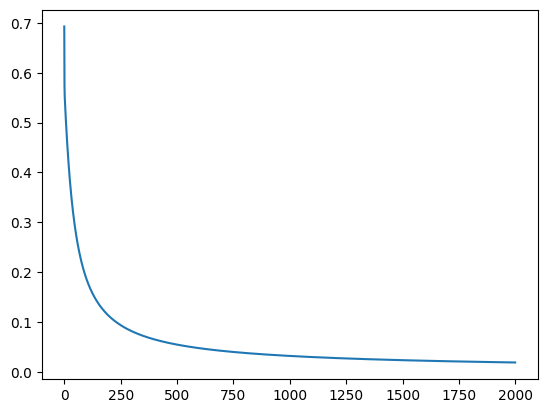

In [23]:
plt.plot(cost)